### Random Forest Regressor:

1. The main aim of this project is to predict the price of the California Housing Dataset using Random Forest Regressor.


2. Then we also need to obtain the most important features from the Random Forest Regressor project.

3. Then predict the output for the given sample data.

### Steps performed by this algorithm:

1.   Import all the necessary libraries

2.   Load the dataset

3.   Explore EDA

4.   Divide the dataset into independent and dependent variables

5.   Divide the independent and dependent variables into training and testing data

6.   Perform the Feature Scaling on the input data

7.   Train the Random Forest Regressor model

8.   Predict the model

9.   Evaluate the model performance

10.  actual vs Predicted price

11.  Check feature importance

12.  Predict the output for the test data

### Step 1:  Import all the necessary libraries

In [831]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from   sklearn.datasets        import      fetch_california_housing
from   sklearn.preprocessing   import      StandardScaler
from   sklearn.model_selection import      train_test_split
from   sklearn.ensemble        import      RandomForestRegressor
from   sklearn.metrics         import      mean_squared_error, mean_absolute_error, root_mean_squared_error

### Step 2:  Load the dataset

In [832]:
data = fetch_california_housing(as_frame=True)

print(data)

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -1

In [833]:
df = data.frame

print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

### OBSERVATIONS:

1.  MedInc  ------------>   Median Income

2.  HouseAge ----------->   Median House Age

3.  AveRooms ----------->   Average no of rooms per household

4.  AveBedrms------------>  Average no of bedrooms per household

5.  Population -----------> Total population per district

6.  AveOccup -------------> Average Occupation per household

7.  Latitude -------------> Geographical Latitude

8.  Longitude -------------> Geographical Longitude

9.  MedHouseVal -----------> Median House Value (Price of the house)

The above dataset describes about the price for the California Housing dataset where all the above are the inputs.

But MedHouseVal is the Output.

### Step 3:  Explore EDA

In [834]:
### Display the entire dataset

print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

In [835]:
### Display the top five rows of the dataset

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [836]:
### Display the bottom five records of the dataset

print(df.tail())

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  


In [837]:
### Get the total number of records in the dataset

print("Total number of records in the dataset is:", len(df))

Total number of records in the dataset is: 20640


In [838]:
### Shape of the dataset

print(df.shape)

(20640, 9)


In [839]:
### Get the information about the dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


### OBSERVATIONS:

1. All the columns are numeric in nature.

In [840]:
### get the summary statistics about the dataset

print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [841]:
### check if there are any NULL Values in the dataset

df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

### OBSERVATIONS:

1. There are no NULL Values in the dataset.

In [842]:
### Check for any duplicate records in the dataset

df[df.duplicated()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


### OBSERVATIONS:

1.  There are no duplicate records in the dataset.

### Step 4: Divide the dataset into independent and dependent variables

In [843]:
X = df.drop(columns='MedHouseVal',axis=1)

Y = df['MedHouseVal']

In [844]:
### Independent Variable

print(X)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [845]:
### Dependent Variable

print(Y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


### Step 5:  Divide the independent and dependent variables into training and testing data

In [846]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [847]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [848]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76


In [849]:
print("Shape of the input training data is:", X_train.shape)

print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (16512, 8)
Shape of the input testing  data is: (4128, 8)


In [850]:
Y_train

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: MedHouseVal, Length: 16512, dtype: float64

In [851]:
Y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: MedHouseVal, Length: 4128, dtype: float64

In [852]:
print("Shape of the output training data is:", Y_train.shape)

print("Shape of the output testing  data is:", Y_test.shape)

Shape of the output training data is: (16512,)
Shape of the output testing  data is: (4128,)


### Step 6:  Perform the Feature Scaling on the input data

In [853]:
from sklearn.preprocessing import StandardScaler

### create an object for Standard Scaler

sc = StandardScaler()

### using the object for Standard Scaler, scale the inputs

X_train_scaled = sc.fit_transform(X_train)

X_test_scaled = sc.transform(X_test)

In [854]:
X_train_scaled

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]], shape=(16512, 8))

In [855]:
X_test_scaled

array([[-1.15508475, -0.28632369, -0.52068576, ...,  0.06740798,
         0.1951    ,  0.28534728],
       [-0.70865905,  0.11043502, -0.16581537, ..., -0.03602975,
        -0.23549054,  0.06097472],
       [-0.21040155,  1.85617335, -0.61076476, ..., -0.14998876,
         1.00947776, -1.42487026],
       ...,
       [ 2.80902421, -0.28632369,  0.75501156, ..., -0.02646898,
         0.78014149, -1.23041404],
       [-0.57542978,  0.58654547, -0.06124296, ..., -0.04390537,
         0.52740357, -0.08860699],
       [-0.17259111, -0.92113763, -0.6058703 , ...,  0.05466644,
        -0.66608108,  0.60445493]], shape=(4128, 8))

### OBSERVATIONS:

1. After performing the feature scaling on the inputs, now all the inputs are in one same range.

### Step 7: Train the Random Forest Regressor model

In [856]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators = 100        ,
    random_state = 42         ,
    max_depth    = None       ,
    n_jobs       = -1
)

In [857]:
### using the object, train the model

model.fit(X_train_scaled, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Step 8:  Predict the model

In [858]:
Y_pred = model.predict(X_test_scaled)

In [859]:
Y_pred

array([0.5095   , 0.74161  , 4.9232571, ..., 4.7582187, 0.71379  ,
       1.65772  ], shape=(4128,))

### Step 9:  Evaluate the model performance

In [860]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R2 Score is:", r2_score(Y_test, Y_pred))
print("Mean Absolute Error is:", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error is:",  mean_squared_error(Y_test, Y_pred))

R2 Score is: 0.8052747336256919
Mean Absolute Error is: 0.3274252027374033
Mean Squared Error is: 0.255169737347244


### Step 10: actual vs Predicted price

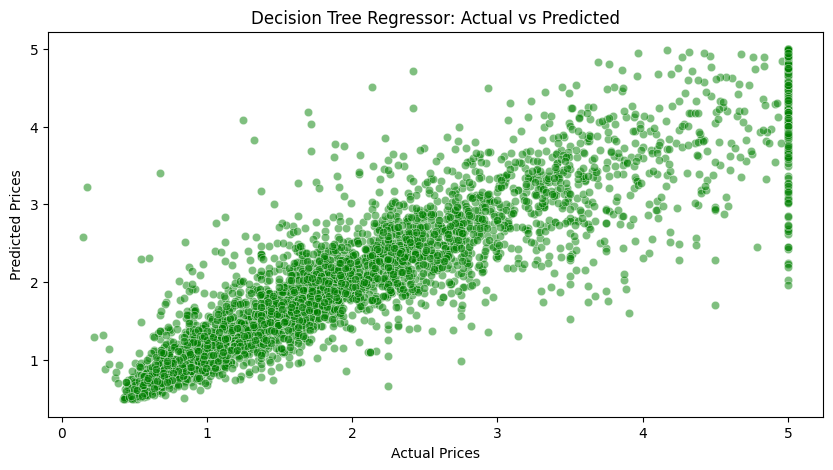

In [861]:
plt.figure(figsize=(10,5))

### plot the Actual vs Predicted Prices
sns.scatterplot(x=Y_test, y=Y_pred,alpha=0.5,color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree Regressor: Actual vs Predicted")
plt.show()

In [862]:
results = pd.DataFrame({'Actual':Y_test[:10], 'Predicted':Y_pred[:10]})

print(results)

        Actual  Predicted
20046  0.47700   0.509500
3024   0.45800   0.741610
15663  5.00001   4.923257
20484  2.18600   2.529610
9814   2.78000   2.273690
13311  1.58700   1.645060
7113   1.98200   2.376610
7668   1.57500   1.670270
18246  3.40000   2.772971
5723   4.46600   4.913459


### Step 11:  Check feature importance

In [863]:
model.feature_importances_

array([0.52487148, 0.05459322, 0.04427185, 0.02960631, 0.03064978,
       0.13844281, 0.08893574, 0.08862881])

In [864]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [865]:
feature_importances = pd.Series(model.feature_importances_, index = X.columns)

In [866]:
feature_importances

MedInc        0.524871
HouseAge      0.054593
AveRooms      0.044272
AveBedrms     0.029606
Population    0.030650
AveOccup      0.138443
Latitude      0.088936
Longitude     0.088629
dtype: float64

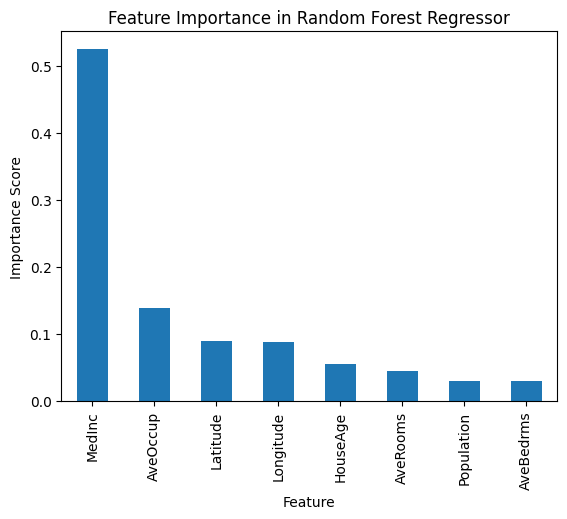

In [867]:
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance in Random Forest Regressor")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

### OBSERVATIONS:

1. From the above graph, MedInc is the feature that is the most important.

## Step 12:  Predict the output for the test data

In [868]:
new_sample = X_test_scaled[0].reshape(1,-1)


predictions = model.predict(new_sample)

print(predictions)

[0.5095]


In [869]:
print(predictions[0])

0.5094999999999998


In [870]:
print(Y_test[0])

4.526
